In [1]:
%matplotlib inline
import pandas as pd
import evaluation_helper as eval
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx_viewer import Viewer


count = 224 - 51
                     
# Read in data
files = []
predictions = []
for i in range(51, 224):
    file = pd.read_csv('./maps/nn_output/probabilities' + str(i) + '.csv', sep=';')
    predictions.append(file['prediction'].values[51:])
    
len(predictions[0])   
    

    

174

In [2]:
averages = []

for i in range (count):
    suma = 0
    for j in range(count):
        suma += predictions[i][j]
    averages.append(suma/count)

relationships = []
for i in range (count):
    relationship = []
    for j in range(count):
        relationship.append(predictions[i][j]/averages[i])
    relationships.append(relationship)

# print(relationships[0])

In [3]:
labels = pd.read_csv('./data/place_code_relat.csv', sep=',')

# labels = labels['name']
labels = labels['name'][48:222]
labels

48                    Albania
49                        NaN
50                        NaN
51                Afghanistan
52                        NaN
53                    Algeria
54                     Angola
55                  Argentina
56                    Armenia
57                  Australia
58                 Azerbaijan
59                    Bahamas
60                 Bangladesh
61                    Belgium
62                     Belize
63                    Belarus
64                      Benin
65                     Bhutan
66                    Bolivia
67     Bosnia and Herzegovina
68                   Botswana
69                     Brazil
70                     Brunei
71                   Bulgaria
72               Burkina Faso
73                    Burundi
74                       Chad
75                 Montenegro
76                 Czech Rep.
77                      China
                ...          
192             United States
193                    Serbia
194      C

In [4]:
df = pd.DataFrame(relationships, columns=[labels[i+48] for i in range(count)])

In [5]:
corr = df.corr()
# corr

In [6]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']



In [15]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)


links_filtered=links.loc[ (links['value'] > 0.60) & (links['var1'] != links['var2']) ]
links_filtered=links_filtered[links_filtered.var1.isnull() == False]
links_filtered=links_filtered[links_filtered.var2.isnull() == False]

links_filtered = links_filtered.sort_values(by=['value'],ascending=False)
links_filtered = links_filtered.groupby('var1').head(2)
links_filtered


,var1,var2,value
1585,Australia,Czech Rep.,0.946601
4853,Czech Rep.,Australia,0.946601
24921,United States,Australia,0.935833
1701,Australia,United States,0.935833
24960,United States,Greenland,0.933439
8448,Greenland,United States,0.933439
21668,Poland,France,0.931958
7564,France,Poland,0.931958
24075,Slovakia,Czech Rep.,0.925595
4983,Czech Rep.,Slovakia,0.925595


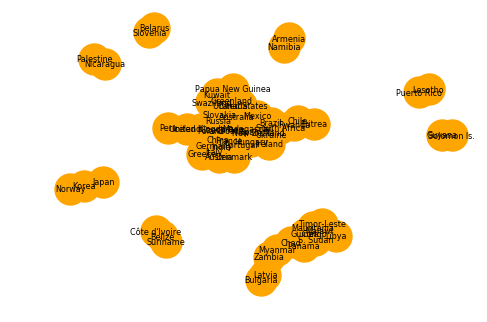

In [16]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=500, edge_color='black', linewidths=10, font_size=8,pos=nx.spring_layout(G))


In [9]:
plt.savefig("graph.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

In [10]:
savefig("graph.png", dpi=1000)

NameError: name 'savefig' is not defined

In [ ]:
app = Viewer(G)